Residual Error: 17.06


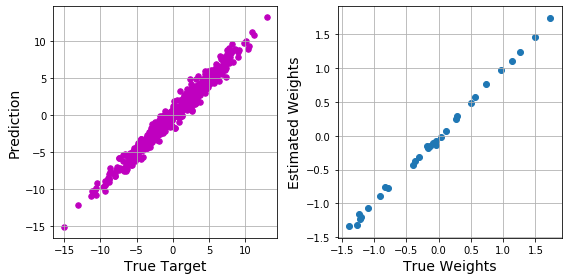

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# Number of data and dimensions
#
N, p = 500, 30

# Input data (covariates) 
#
X = np.random.randn(N, p)

# True parameters
#
wTrue = np.random.randn(p, 1)

# Set up targets (response)
#
yTarget = X @ wTrue + 0.8 * np.random.randn(N,1)

# Estimate the weights by pseudo inverse
#
wEst = np.linalg.inv(X.T @ X) @ X.T @ yTarget

# Predict from the model
#
yEst = X @ wEst

# Scatter plot of predictions against truth
#
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8,4)) 
ax[0].scatter(yTarget, yEst, c='m', s=30) 
ax[0].grid(True)
ax[0].set_xlabel("True Target", fontsize=14) 
ax[0].set_ylabel("Prediction", fontsize=14)
ax[1].scatter(wTrue, wEst)
ax[1].grid(True)
ax[1].set_xlabel("True Weights", fontsize=14) 
ax[1].set_ylabel("Estimated Weights", fontsize=14) 
plt.tight_layout()
plt.savefig("SimpleLinearRegression.png")
# Error from the model
#
print("Residual Error: %3.2f" %(np.linalg.norm(yEst - yTarget)))

GD: Residual Error (Initial) : 210.25
GD: Residual Error (Converged): 17.27
SGD: Residual Error (Initial) : 34.69
SGD: Residual Error (Converged): 0.00
SGD: Residual Error (Initial) : 210.25
SGD: Residual Error (Converged): 18.02
(500, 1)


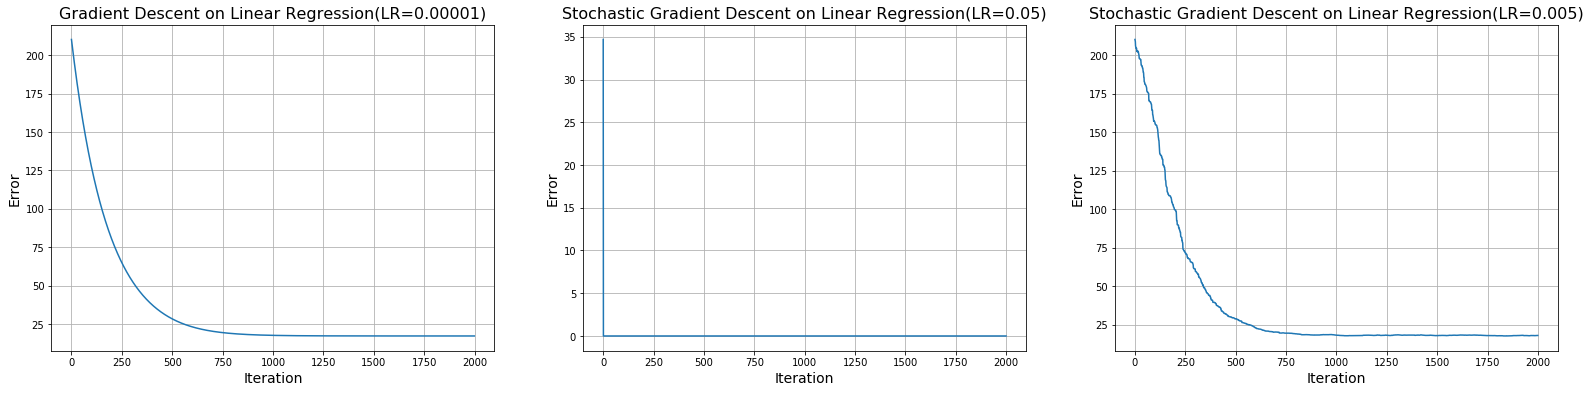

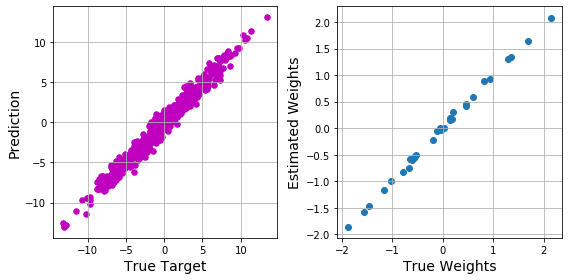

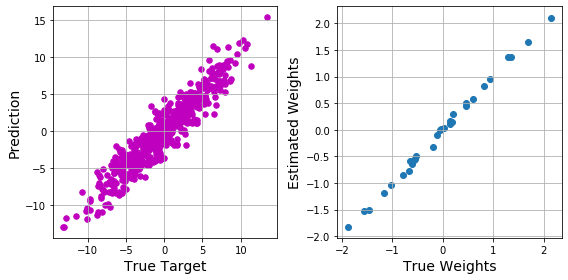

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# Set up synthetic data
#
N, p = 500, 30
X = np.random.randn(N, p)
wTrue = np.random.randn(p, 1)
yTarget = X @ wTrue + 0.8*np.random.randn(N,1)

# Initial guess and error
#
w0 = np.random.randn(p,1)
E0 = np.linalg.norm(yTarget - X @ w0)

# Parameters for gradient descent 
#
MaxIter = 2000
lRate = 0.00001
lRate_sgd = 0.05
lRate_sgd_2 = 0.005
Eplot = np.zeros((MaxIter, 1))
Eplot_sgd = np.zeros((MaxIter, 1))
Eplot_sgd_2 = np.zeros((MaxIter, 1))

#GD
wIter= w0
for iter in range(MaxIter):
    Eplot[iter] = np.linalg.norm(X @ wIter - yTarget)
    wIter = wIter - lRate * X.T @ (X @ wIter - yTarget) 
    
    

#SGD
wIter_sgd = w0
for iter in range(MaxIter*10):
    if iter % 10 == 0:
        Eplot_sgd[iter % 10] = np.linalg.norm(yTarget - X @ wIter_sgd)
    j = np.floor(np.random.rand()*N).astype(int) 
    xj = np.array([X[j,:]]).T
    yj = yTarget[j,:]
    yPred = xj.T @ wIter_sgd
    wIter_sgd = wIter_sgd - lRate_sgd * (yPred - yj) * xj 
    
#SGD_2
wIter_sgd_2 = w0
for iter in range(MaxIter):
    Eplot_sgd_2[iter] = np.linalg.norm(yTarget - X @ wIter_sgd_2)
    j = np.floor(np.random.rand()*N).astype(int) 
    xj = np.array([X[j,:]]).T
    yj = yTarget[j,:]
    yPred = xj.T @ wIter_sgd_2
    wIter_sgd_2 = wIter_sgd_2 - lRate_sgd_2 * (yPred - yj) * xj 

print("GD: Residual Error (Initial) : %3.2f" %(Eplot[0]))
print("GD: Residual Error (Converged): %3.2f" %(Eplot[MaxIter - 1])) 

print("SGD: Residual Error (Initial) : %3.2f" %(Eplot_sgd[0]))
print("SGD: Residual Error (Converged): %3.2f" %(Eplot_sgd[MaxIter - 1])) 

print("SGD: Residual Error (Initial) : %3.2f" %(Eplot_sgd_2[0]))
print("SGD: Residual Error (Converged): %3.2f" %(Eplot_sgd_2[MaxIter - 1]))

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(27,6)) 
# fig, ax = plt.subplots(figsize=(6,6)) 
ax[0].plot(Eplot) 
ax[0].set_xlabel("Iteration", fontsize=14) 
ax[0].set_ylabel("Error", fontsize=14) 
ax[0].grid(True)
ax[0].set_title("Gradient Descent on Linear Regression(LR=0.00001)", fontsize=16)

ax[1].plot(Eplot_sgd) 
ax[1].set_xlabel("Iteration", fontsize=14) 
ax[1].set_ylabel("Error", fontsize=14) 
ax[1].grid(True)
ax[1].set_title("Stochastic Gradient Descent on Linear Regression(LR=0.05)", fontsize=16)

ax[2].plot(Eplot_sgd_2) 
ax[2].set_xlabel("Iteration", fontsize=14) 
ax[2].set_ylabel("Error", fontsize=14) 
ax[2].grid(True)
ax[2].set_title("Stochastic Gradient Descent on Linear Regression(LR=0.005)", fontsize=16)

plt.savefig("GDLearningCurve&SGDLearningCurve.png")

yIter = X @ wIter
yIter_sgd = X @ wIter_sgd
print(yIter.shape)

# Scatter plot of predictions against truth
#
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8,4)) 
ax[0].scatter(yTarget, yIter, c='m', s=30) 
ax[0].grid(True)
ax[0].set_xlabel("True Target", fontsize=14) 
ax[0].set_ylabel("Prediction", fontsize=14)
ax[1].scatter(wTrue, wIter)
ax[1].grid(True)
ax[1].set_xlabel("True Weights", fontsize=14) 
ax[1].set_ylabel("Estimated Weights", fontsize=14)
plt.tight_layout()
plt.savefig("1.png")

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8,4)) 
ax[0].scatter(yTarget, yIter_sgd, c='m', s=30) 
ax[0].grid(True)
ax[0].set_xlabel("True Target", fontsize=14) 
ax[0].set_ylabel("Prediction", fontsize=14)
ax[1].scatter(wTrue, wIter_sgd_2)
ax[1].grid(True)
ax[1].set_xlabel("True Weights", fontsize=14) 
ax[1].set_ylabel("Estimated Weights", fontsize=14)
plt.tight_layout()
plt.savefig("2.png")


Initial: 175.5463041124433
converaged: 19.069273674972745


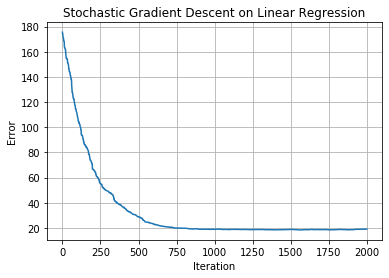

In [4]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# Number of data and dimensions
#
N, p = 500, 30

# Input data (covariates) 
#
X = np.random.randn(N, p)

# True parameters
#
wTrue = np.random.randn(p, 1)

# Set up targets (response)
#
yTarget = X @ wTrue + 0.8*np.random.randn(N,1)
w0 = np.random.randn(p,1)
E0 = np.linalg.norm(yTarget - X @ w0) 
print('Initial:',E0)

MaxIter = 2000
lRate = 0.005
Eplot = np.zeros((MaxIter, 1))

wIter = w0
for iter in range(MaxIter):
    j = np.floor(np.random.rand()*N).astype(int) 
    # xj = X[j,:].T
    xj = np.array([X[j,:]]).T
    yj = yTarget[j,:]
    yPred = xj.T @ wIter
    wIter = wIter - lRate * (yPred - yj) * xj 
    Eplot[iter] = np.linalg.norm(yTarget - X @ wIter)
    
print('converaged:', np.linalg.norm(yTarget - X @ wIter)) 
fig, ax = plt.subplots()
ax.plot(Eplot)
ax.set_xlabel("Iteration") 
ax.set_ylabel("Error")
ax.grid(True)
ax.set_title("Stochastic Gradient Descent on Linear Regression") 
plt.savefig("SGDLearningCurve.png")

(500, 1)
Initial: 279.9655781413415
converaged: 45.68954566979808


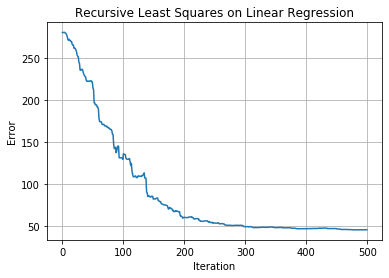

In [5]:
# RlS
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# Number of data and dimensions
#
N, p = 500, 100

# Input data (covariates) 
#
X = np.random.randn(N, p)

# True parameters
#
wTrue = np.random.randn(p, 1)

# Set up targets (response)
#
yTarget = X @ wTrue + 2*np.random.randn(N,1)
print(yTarget.shape)
w0 = np.random.randn(p,1)

MaxIter = N
Lambda = 1
P = np.identity(p)
Eplot = np.zeros((MaxIter, 1))
wIter = w0

for iter in range(MaxIter):
    j = np.floor(np.random.rand()*N).astype(int)
    xj = np.array([X[j,:]]).T
    yj = yTarget[j,:]
    Eplot[iter] = np.linalg.norm(yTarget - X @ wIter)
    k = ((1/Lambda) * P @ xj) / (1 + (1/Lambda) * xj.T @ P @ xj)
    wIter = wIter + k @ (yj - xj.T @ wIter)
    P = (1/Lambda) * P - (1/Lambda) * k @ xj.T @ P
    
print('Initial:',np.linalg.norm(yTarget - X @ w0))
print('converaged:', np.linalg.norm(yTarget - X @ wIter)) 
fig, ax = plt.subplots()
ax.plot(Eplot)
ax.set_xlabel("Iteration") 
ax.set_ylabel("Error")
ax.grid(True)
ax.set_title("Recursive Least Squares on Linear Regression") 
plt.savefig("RLSLearningCurve.png")

Initial: 8164.097435838907
converaged: 112.65495528807345


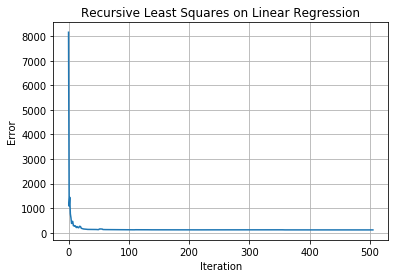

In [10]:
import numpy as np
import sklearn.datasets
import matplotlib.pyplot as plt

dataInitial = sklearn.datasets.load_boston()
X = np.array(dataInitial.data)
y = np.array(dataInitial.target)
yTarget = y.reshape((y.shape[0], 1))

# print(X.shape, yTarget[0])
N = len(X)
p = np.shape(X)[1]

w0 = np.random.randn(p,1)
N = len(X)
MaxIter = N
Lambda = 1
P = np.identity(p)
Eplot = np.zeros((MaxIter, 1))
wIter = w0

for iter in range(MaxIter):
    j = np.floor(np.random.rand()*N).astype(int)
    xj = np.array([X[j,:]]).T
    yj = yTarget[j,:]
    Eplot[iter] = np.linalg.norm(yTarget - X @ wIter)
    k = ((1/Lambda) * P @ xj) / (1 + (1/Lambda) * xj.T @ P @ xj)
    wIter = wIter + k @ (yj - xj.T @ wIter)
    P = (1/Lambda) * P - (1/Lambda) * k @ xj.T @ P
    
print('Initial:',np.linalg.norm(yTarget - X @ w0))
print('converaged:', np.linalg.norm(yTarget - X @ wIter)) 
fig, ax = plt.subplots()
ax.plot(Eplot)
ax.set_xlabel("Iteration") 
ax.set_ylabel("Error")
ax.grid(True)
ax.set_title("Recursive Least Squares on Linear Regression") 
plt.savefig("boston.png")

[28203.94598866] [6377.0028893]


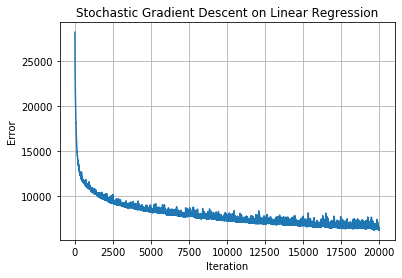

In [16]:
%matplotlib inline
import numpy as np
import sklearn.datasets
import matplotlib.pyplot as plt

dataInitial = sklearn.datasets.load_boston()
x = np.array(dataInitial.data)
y = np.array(dataInitial.target)
y = y.reshape((y.shape[0], 1))
N = len(X)
p = featureNum = np.shape(X)[1]

MaxIter = 20000
lRate = 0.000001
Eplot = np.zeros((MaxIter, 1))
wIter = w0

for iter in range(MaxIter):
    j = np.floor(np.random.rand()*N).astype(int)
    xj = np.array([X[j,:]]).T
    yj = yTarget[j,:]
    yPred = xj.T @ wIter
    wIter = wIter - lRate * (yPred - yj) * xj.T
    Eplot[iter] = np.linalg.norm(yTarget - X @ wIter)
    
print(Eplot[0], Eplot[MaxIter-1])
fig, ax = plt.subplots()
ax.plot(Eplot)
ax.set_xlabel("Iteration")
ax.set_ylabel("Error")
ax.grid(True)
ax.set_title("Stochastic Gradient Descent on Linear Regression")
plt.savefig("boston.png")

(150, 4) (150, 1)
Initial: [130.09822131]
converaged: 42.418172908738605


Text(0.5, 1.0, 'Stochastic Gradient Descent on Linear Regression')

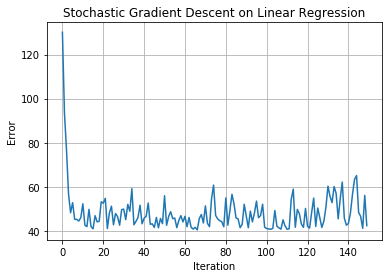

In [19]:
%matplotlib inline
import numpy as np
import sklearn.datasets
import matplotlib.pyplot as plt

dataInitial = sklearn.datasets.load_iris()
X = np.array(dataInitial.data)
y = np.array(dataInitial.target)
y = y.reshape((y.shape[0], 1))
yTarget = y
print(X.shape, yTarget.shape)
N = len(X)
p = featureNum = np.shape(X)[1]

w0 = np.random.randn(p,1)

MaxIter = 
lRate = 0.001
Eplot = np.zeros((MaxIter, 1))
Eplot_test = np.zeros((MaxIter, 1))
wIter= w0

for iter in range(MaxIter):
    j = np.floor(np.random.rand()*N).astype(int)
    xj = np.array([X[j,:]]).T
    yj = yTarget[j,:]
    yPred = xj.T @ wIter
    wIter = wIter - lRate * (yPred - yj) * xj.T
    Eplot[iter] = np.linalg.norm(yTarget - X @ wIter)
#     Eplot_test[iter] = np.linalg.norm(y_test - x_test @ wIter)
    
print('Initial:',Eplot[0])
print('converaged:', np.linalg.norm(yTarget - X @ wIter)) 
fig, ax = plt.subplots()
ax.plot(Eplot)
ax.set_xlabel("Iteration")
ax.set_ylabel("Error")
ax.grid(True)
ax.set_title("Stochastic Gradient Descent on Linear Regression")
# plt.savefig("iris.png")

# fig, ax = plt.subplots()
# ax.plot(Eplot_test)
# ax.set_xlabel("Iteration")
# ax.set_ylabel("Error")
# ax.grid(True)
# ax.set_title("Stochastic Gradient Descent on Linear Regression")

Initial: 162.86046557313625
converaged(SGD): 68.3799661472464
converaged(RSL): 2.6774495763955373


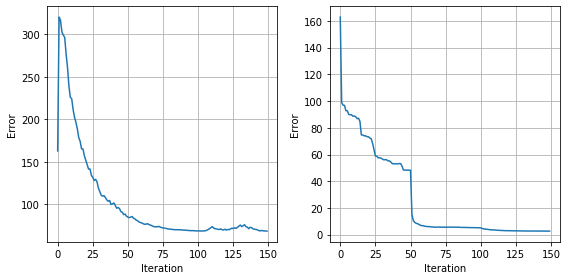

In [20]:
%matplotlib inline
import numpy as np
import sklearn.datasets
import matplotlib.pyplot as plt

dataInitial = sklearn.datasets.load_iris()

X = np.array(dataInitial.data)
y = np.array(dataInitial.target)
y = y.reshape((y.shape[0], 1))
yTarget = y
N = len(X)
p = featureNum = np.shape(X)[1]

w0 = np.random.randn(p,1)
N = len(X)
MaxIter = N
Lambda = 1
P = np.identity(p)
Eplot = np.zeros((MaxIter, 1))
# Eplot_test = np.zeros((MaxIter, 1))

#SGD
lRate = 0.001
Eplot_sgd = np.zeros((MaxIter, 1))
wIter_sgd = w0

for iter in range(MaxIter):
    Eplot_sgd[iter] = np.linalg.norm(yTarget - X @ wIter_sgd)
    j = np.floor(np.random.rand()*N).astype(int)
    xj = np.array([X[j,:]]).T
    yj = yTarget[j,:]
    
    yPred = xj.T @ wIter_sgd
    wIter_sgd = wIter_sgd - lRate * (yPred - yj) * xj.T
    
#     Eplot_test[iter] = np.linalg.norm(y_test - x_test @ wIter)

#RLS
wIter = w0
for iter in range(MaxIter):
    j = iter
    xj = np.array([X[j,:]]).T
    yj = yTarget[j,:]
    Eplot[iter] = np.linalg.norm(yTarget - X @ wIter)
#     Eplot_test[iter] = np.linalg.norm(y_test - x_test @ wIter)
    k = ((1/Lambda) * P @ xj) / (1 + (1/Lambda) * xj.T @ P @ xj)
    wIter = wIter + k @ (yj - xj.T @ wIter)
    P = (1/Lambda) * P - (1/Lambda) * k @ xj.T @ P
    

print('Initial:',np.linalg.norm(yTarget - X @ w0))
print('converaged(SGD):', np.linalg.norm(yTarget - X @ wIter_sgd)) 
print('converaged(RSL):', np.linalg.norm(yTarget - X @ wIter)) 
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8,4)) 
ax[0].plot(Eplot_sgd)
ax[0].set_xlabel("Iteration") 
ax[0].set_ylabel("Error")
ax[0].grid(True)

ax[1].plot(Eplot)
ax[1].set_xlabel("Iteration") 
ax[1].set_ylabel("Error")
ax[1].grid(True)

plt.tight_layout()
# ax.set_title("Recursive Least Squares on Linear Regression") 
plt.savefig("iris.png")

# fig, ax = plt.subplots()
# ax.plot(Eplot_test)
# ax.set_xlabel("Iteration") 
# ax.set_ylabel("Error")
# ax.grid(True)
# ax.set_title("Recursive Least Squares on Linear Regression") 
